In this notebook I will measure the SFS for $M_*$ and SFR measured within the subhalo, 70kpc, 50kpc, 30kpc

In [1]:
import numpy as np 
# -- iquench -- 
from letstalkaboutquench import util as UT
from letstalkaboutquench import catalogs as Cats
from letstalkaboutquench import fstarforms as fSFS

In [2]:
import corner as DFM
import matplotlib as mpl
import matplotlib.pyplot as plt 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

Read in EAGLE $M_*$ and SFRs

In [5]:
# 0: GroupNr, 1: SubGroupNr, 2: log10(Mstartotal[Msun]) 3: log10(Mstarin70kpc[Msun]), 4: log10(Mstarin50kpc[Msun]), 5: log10(Mstarin30kpc[Msun]), 6: log10(SFRtotal[Msun/yr]), 7: log10(SFRin70kpc[Msun/yr]), 8: log10(SFRin50kpc[Msun/yr]), 9: log10(SFRin30kpc[Msun/yr])
logmtot, logm70, logm50, logm30, logsfrtot, logsfr70, logsfr50, logsfr30 = np.loadtxt(
    ''.join([UT.dat_dir(), 'EAGLE_RefL0100Hash_MstarSFRradii_allabove1.8e8Msun.txt']), skiprows=1, 
    unpack=True, usecols=[2,3,4,5,6,7,8,9])

In [12]:
# many log(SFR) = inf
rtot = np.isfinite(logsfrtot)
r70 = np.isfinite(logsfr70)
r50 = np.isfinite(logsfr50)
r30 = np.isfinite(logsfr30)
print("%f of log(SFR tot) is finite" % (np.sum(rtot)/float(len(rtot))))
print("%f of log(SFR 70) is finite" % (np.sum(r70)/float(len(r70))))
print("%f of log(SFR 50) is finite" % (np.sum(r50)/float(len(r50))))
print("%f of log(SFR 30) is finite" % (np.sum(r30)/float(len(r30))))

0.654658 of log(SFR tot) is finite
0.653249 of log(SFR 70) is finite
0.652544 of log(SFR 50) is finite
0.651068 of log(SFR 30) is finite


(-4.0, 2.0)

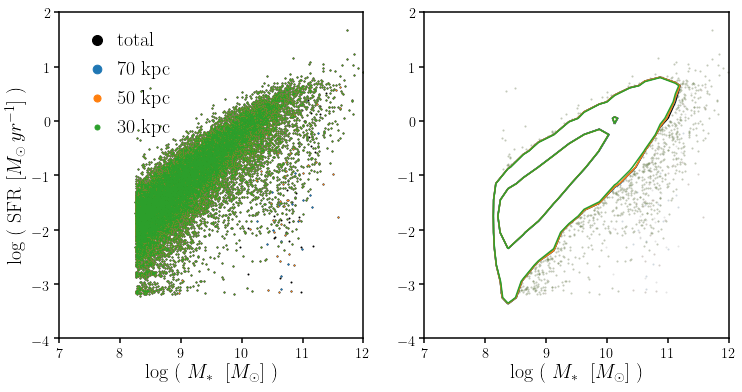

In [14]:
fig = plt.figure(figsize=(12,6))
sub = fig.add_subplot(121)
sub.scatter(logmtot[rtot], logsfrtot[rtot], c='k', s=1, label='total')
sub.scatter(logmtot[r70], logsfrtot[r70], c='C0', s=0.75, label='70 kpc')
sub.scatter(logmtot[r50], logsfrtot[r50], c='C1', s=0.5, label='50 kpc')
sub.scatter(logmtot[r30], logsfrtot[r30], c='C2', s=0.25, label='30 kpc')
sub.legend(loc='upper left', markerscale=10, handletextpad=0., prop={'size':20})
sub.set_xlabel(r'log ( $M_* \;\;[M_\odot]$ )', fontsize=20)
sub.set_xlim([7., 12.])
sub.set_ylabel(r'log ( SFR $[M_\odot \, yr^{-1}]$ )', fontsize=20)
sub.set_ylim([-4., 2.])

sub = fig.add_subplot(122)
plot_range = [[7., 12.], [-4., 2.]]
DFM.hist2d(logmtot[rtot], logsfrtot[rtot], color='k',
           levels=[0.68, 0.95], range=plot_range, plot_density=False, fill_contours=False, ax=sub)
DFM.hist2d(logmtot[r70], logsfrtot[r70], color='C0',
           levels=[0.68, 0.95], range=plot_range, plot_density=False, fill_contours=False, ax=sub)
DFM.hist2d(logmtot[r50], logsfrtot[r50], color='C1',
           levels=[0.68, 0.95], range=plot_range, plot_density=False, fill_contours=False, ax=sub)
DFM.hist2d(logmtot[r30], logsfrtot[r30], color='C2',
           levels=[0.68, 0.95], range=plot_range, plot_density=False, fill_contours=False, ax=sub)
sub.legend(loc='upper left', markerscale=10, handletextpad=0., prop={'size':20})
sub.set_xlabel(r'log ( $M_* \;\;[M_\odot]$ )', fontsize=20)
sub.set_xlim([7., 12.])
sub.set_ylim([-4., 2.])

By eye, there's no impact of aperture correction. 

In [15]:
fitSFS = fSFS.fstarforms() 
sfs_logm_tot, sfs_logsfr_tot, sfs_errlogsfr_tot = fitSFS.fit(logmtot[rtot], logsfrtot[rtot], Nbin_thresh=25, n_bootstrap=100) 
sfs_logm_70, sfs_logsfr_70, sfs_errlogsfr_70 = fitSFS.fit(logmtot[r70], logsfrtot[r70], Nbin_thresh=25, n_bootstrap=100) 
sfs_logm_50, sfs_logsfr_50, sfs_errlogsfr_50 = fitSFS.fit(logmtot[r50], logsfrtot[r50], Nbin_thresh=25, n_bootstrap=100) 
sfs_logm_30, sfs_logsfr_30, sfs_errlogsfr_30 = fitSFS.fit(logmtot[r30], logsfrtot[r30], Nbin_thresh=25, n_bootstrap=100) 

(-4.0, 2.0)

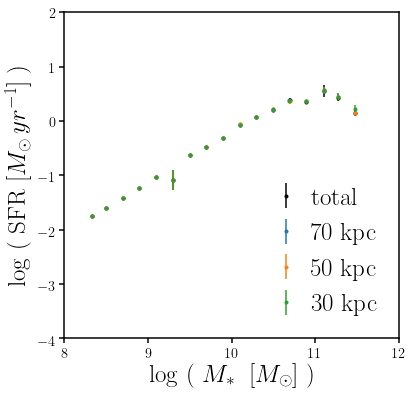

In [19]:
fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)
sub.errorbar(sfs_logm_tot, sfs_logsfr_tot, yerr=sfs_errlogsfr_tot, fmt='.k', label='total')
sub.errorbar(sfs_logm_70, sfs_logsfr_70, yerr=sfs_errlogsfr_70, fmt='.C0', label='70 kpc')
sub.errorbar(sfs_logm_50, sfs_logsfr_50, yerr=sfs_errlogsfr_50, fmt='.C1', label='50 kpc')
sub.errorbar(sfs_logm_30, sfs_logsfr_30, yerr=sfs_errlogsfr_30, fmt='.C2', label='30 kpc')
sub.legend(loc='lower right', handletextpad=0., prop={'size':25})
sub.set_xlabel(r'log ( $M_* \;\;[M_\odot]$ )', fontsize=25)
sub.set_xlim([8., 12.])
sub.set_ylabel(r'log ( SFR $[M_\odot \, yr^{-1}]$ )', fontsize=25)
sub.set_ylim([-4., 2.])